<a href="https://colab.research.google.com/github/AJ-Abisola/EDA/blob/main/EDA_911_Calls_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *911 Calls Exploratory Analysis*

*By AJ ABISOLA*


**DATA**

For this project, analysis will be done on some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


*Check the first 3 rows of df*

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Exploration

In [6]:
#Check all columns
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [7]:
#Top 5 zip codes

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
#Top 5 townships 

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
#UNIQUE Titles

df['title'].nunique()

110

In [10]:
#Grabbing one title to see its format

df['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

***It can be seen that the title is in two parts, a main reason and a sub-reason. Lets create a new column for the reason***

## Creating new features

In [11]:
#Creating reason column
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [12]:
# Check for the most common reason for a 911 call
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Text(0.5, 1.0, 'Countplot of Reasons')

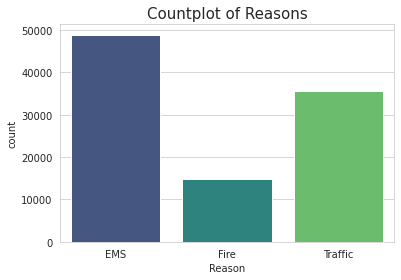

In [13]:
sns.countplot(x='Reason',data=df,palette='viridis')
plt.title('Countplot of Reasons', fontdict={'size':15})

***Emergency Medical Services(EMS) is the most common reason as seen in the plot***

___
***We also have a timestamp column, lets explore that***

In [14]:
#check Feature type

type(df['timeStamp'].iloc[0])

str

In [15]:
#Converting the string to an actual Datetime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
#Splitting the datetime into different attributes 

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [17]:
#Mapping the days of the week

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

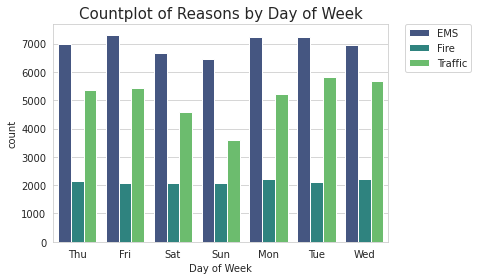

In [18]:
#Creating a countplot of calls during the day of the week using the reason column as hue

sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.title('Countplot of Reasons by Day of Week', fontdict={'size':15})

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

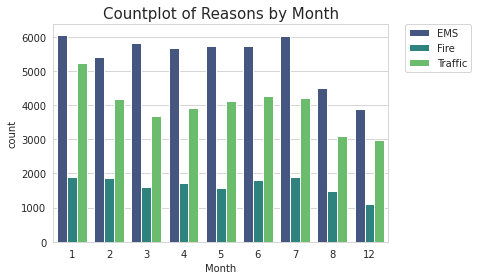

In [19]:
#Creating a countplot of calls during a month using the reason column as hue

sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.title('Countplot of Reasons by Month', fontdict={'size':15})

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

***The plot is missing some months; the 9th,10th and 11th month. Lets try to fill in those months with a line plot.***

In [20]:
#group Data by the month column and display the first 5

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Text(0.5, 1.0, 'Full Monthly count of reasons')

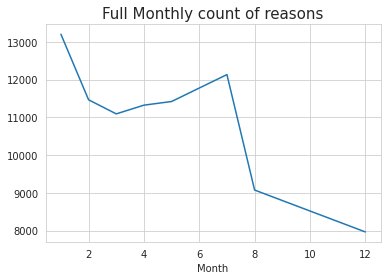

In [21]:
# A simple plot of the calls per month
byMonth['twp'].plot()
plt.title('Full Monthly count of reasons', fontdict={'size':15})

Text(0.5, 1.0, 'Linear regression fit of Reasons by Month')

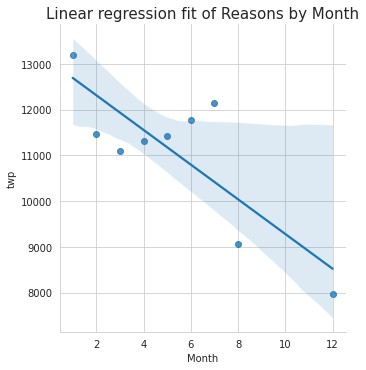

In [23]:
#A linear regression plot

sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
plt.title('Linear regression fit of Reasons by Month', fontdict={'size':15})

***This shows overall, the calls reduces linearly towards the end of the year. Lets Check the rate of calls per day***

In [24]:
#Creating a Date column
df['Date']=df['timeStamp'].apply(lambda t: t.date())

Text(0.5, 1.0, 'Daily Rate of calls')

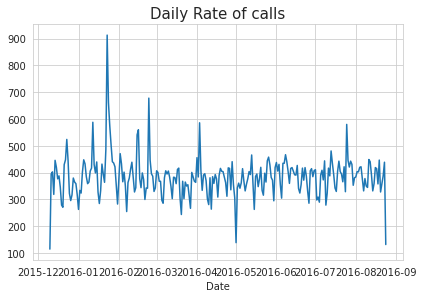

In [25]:
#Group data by date and take a count to plot

df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Daily Rate of calls', fontdict={'size':15})

***Now the plot will be recreated in 3 separate plots with each plot representing a Reason for the 911 call***

Text(0.5, 1.0, 'Daily Rate of 911 Traffic calls')

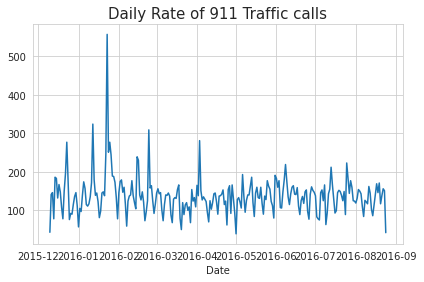

In [26]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.title('Daily Rate of 911 Traffic calls', fontdict={'size':15})

Text(0.5, 1.0, 'Daily Rate of 911 Fire calls')

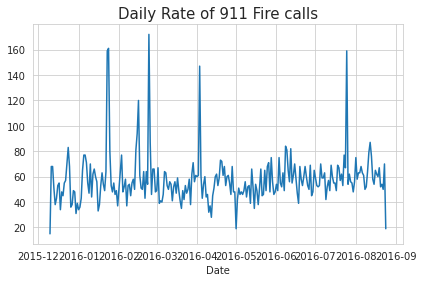

In [27]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()
plt.title('Daily Rate of 911 Fire calls', fontdict={'size':15})

Text(0.5, 1.0, 'Daily Rate of 911 EMS calls')

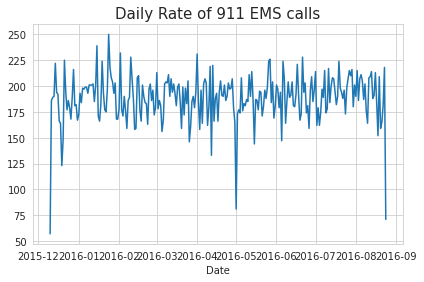

In [28]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.title('Daily Rate of 911 EMS calls', fontdict={'size':15})

____
***Now let's creating some heatmaps. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.***

In [29]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Text(0.5, 1.0, 'Heatmap of daily calls per hour')

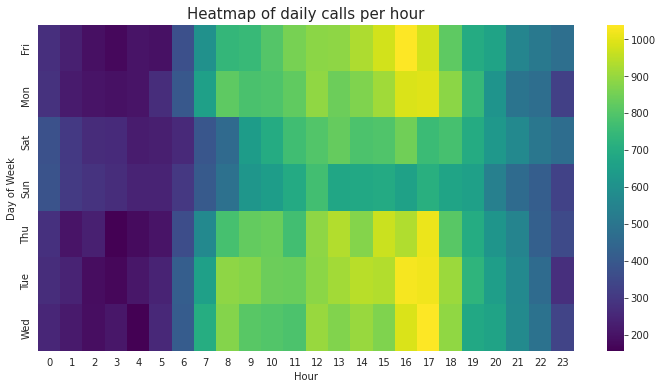

In [30]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')
plt.title('Heatmap of daily calls per hour', fontdict={'size':15})

Text(0.5, 1.0, 'Clustermap of daily calls per hour')

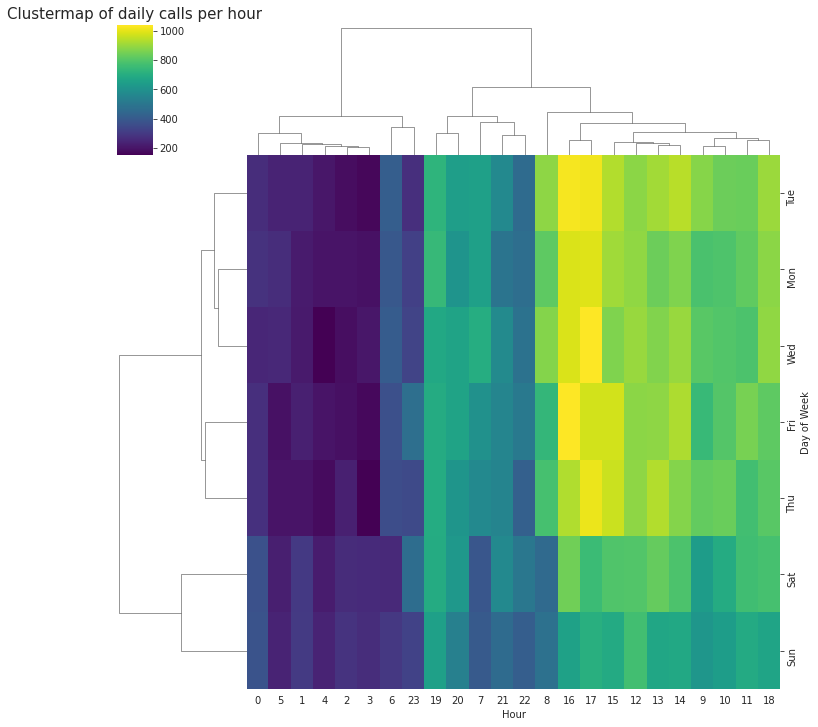

In [31]:
sns.clustermap(dayHour,cmap='viridis')
plt.title('Clustermap of daily calls per hour', fontdict={'size':15})

***It is notably seen that there are lots of calls during the weekdays than weekends with a concentration between the hours of 14:00 and 17:00. THere are peak noumber of calls around 17:00. THe early hours of the day; 00:00 to 06:00 experience the lowest amount of calls, which is ideal.***

***Now let's repeat these same plots and operations, for a DataFrame that shows the Month as the column.***

In [32]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


Text(0.5, 1.0, 'Heatmap of daily calls per Month')

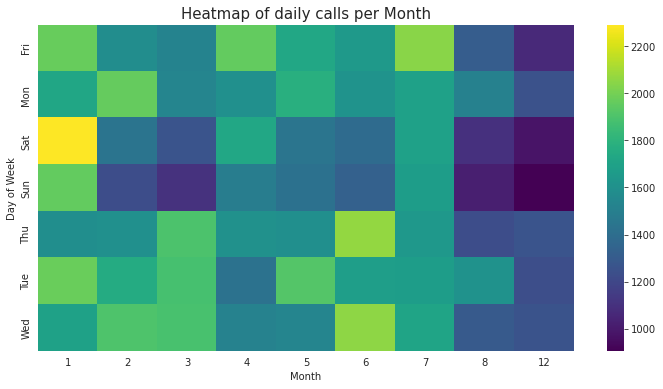

In [33]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')
plt.title('Heatmap of daily calls per Month', fontdict={'size':15})

Text(0.5, 1.0, 'Clustermap of daily calls per Month')

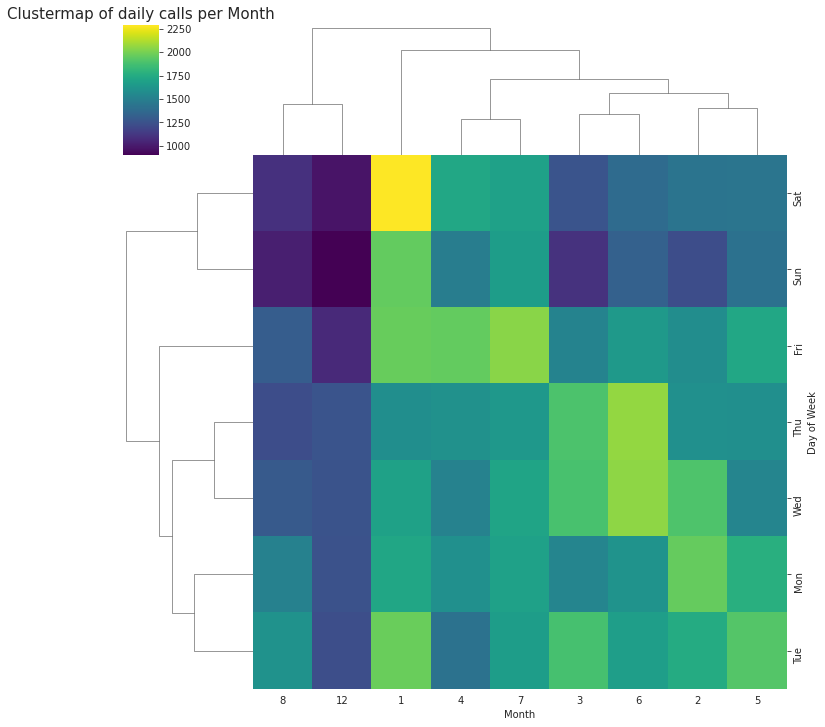

In [34]:
sns.clustermap(dayMonth,cmap='viridis')
plt.title('Clustermap of daily calls per Month', fontdict={'size':15})

***To a good extent, weekends still experience a lesser amount of calls compared to weekdays, except for saturdays in the month of january***

# Conclusion

***This data has been well explored and major details have been extracted,more could still be inferred with more exploration based on questions that need answers. However, it is clear that the evening of weekdays are expected to be more than the usual busy for a 911 operative with calls coming in mostly for Emergency Medical Services.***